In [1]:
# 📦 Step 1: Install Required Libraries
!pip install opencv-python-headless tensorflow scipy -q

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from google.colab import files
from tensorflow.keras.layers import Dropout
%matplotlib inline
from scipy import ndimage

In [3]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=20, validation_data=(x_test, y_test_cat))  # ⏫ More epochs


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8906 - loss: 0.3480 - val_accuracy: 0.9835 - val_loss: 0.0538
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9817 - loss: 0.0621 - val_accuracy: 0.9894 - val_loss: 0.0344
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9903 - val_loss: 0.0303
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9899 - loss: 0.0327 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9920 - loss: 0.0263 - val_accuracy: 0.9914 - val_loss: 0.0254
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9921 - val_loss: 0.0260
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9949 - loss: 0.0166 - val_accuracy: 0.9935 - val_loss: 0.0257
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9951 -

In [5]:

model.save("mnist_cnn.keras")

In [46]:

print("👉 Please upload a digit image drawn in Paint (white background, black digit)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]


👉 Please upload a digit image drawn in Paint (white background, black digit)


Saving 1.png to 1 (1).png


In [47]:

def center_image(img):
    cy, cx = ndimage.center_of_mass(img)
    shiftx = np.round(img.shape[1]/2.0 - cx).astype(int)
    shifty = np.round(img.shape[0]/2.0 - cy).astype(int)
    return ndimage.shift(img, shift=[shifty, shiftx], mode='constant')


In [48]:
def preprocess_image_with_visualization(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("⚠️ Error: Could not load image.")
        return None

    plt.figure(figsize=(15, 3))
    plt.subplot(151)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    if np.mean(img) > 127:
        img = 255 - img
    plt.subplot(152)
    plt.imshow(img, cmap='gray')
    plt.title("Inverted")
    plt.axis('off')
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)
    plt.subplot(153)
    plt.imshow(img, cmap='gray')
    plt.title("Thresholded")
    plt.axis('off')
    contours, _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("⚠️ No digit found.")
        return None
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = img[y:y+h, x:x+w]
    plt.subplot(154)
    plt.imshow(digit, cmap='gray')
    plt.title("Cropped")
    plt.axis('off')
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_NEAREST)
    digit = np.pad(digit, ((4, 4), (4, 4)), mode='constant', constant_values=0)
    digit = center_image(digit)
    digit = digit / 255.0
    plt.subplot(155)
    plt.imshow(digit, cmap='gray')
    plt.title("Final (28x28)")
    plt.axis('off')
    plt.show()
    return digit.reshape(1, 28, 28, 1)

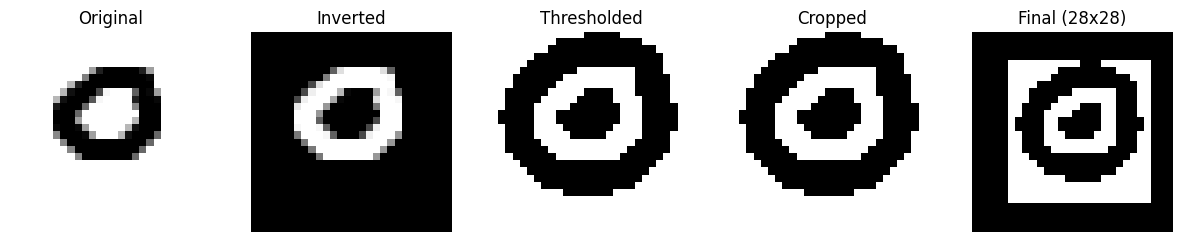

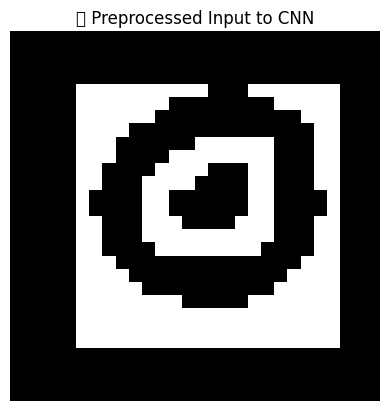

In [49]:
model = load_model("mnist_cnn.keras")
input_img = preprocess_image_with_visualization(filename)
plt.imshow(input_img[0, :, :, 0], cmap='gray')
plt.title("👀 Preprocessed Input to CNN")
plt.axis('off')
plt.show()
if input_img is not None:
    prediction = model.predict(input_img, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)

Predicted Digit: 0 (Confidence: 1.00)


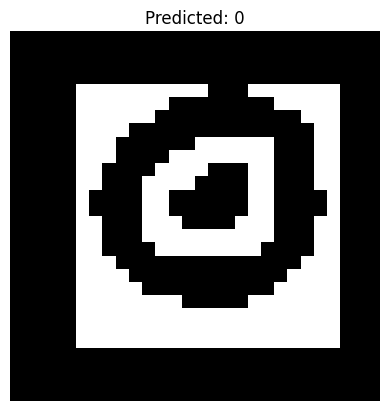

In [51]:
print(f"Predicted Digit: {predicted_digit} (Confidence: {confidence:.2f})")
plt.imshow(input_img[0, :, :, 0], cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis('off')
plt.show()